In [19]:
import pandas as pd
import numpy as np

In [33]:
df = pd.read_csv('/Users/andrespatrignani/Dropbox/Teaching/Scientific programming/introcoding-spring-2019/Datasets/ok_mesonet_8_apr_2019.csv', sep=',')

In [34]:
df.head(5)

,STID,NAME,ST,LAT,LON,YR,MO,DA,HR,MI,...,RELH,CHIL,HEAT,WDIR,WSPD,WMAX,PRES,TMAX,TMIN,RAIN
0,ACME,Acme,OK,34.81,-98.02,2019,4,15,15,20,...,,,,,,,,,,
1,ADAX,Ada,OK,34.80,-96.67,2019,4,15,15,20,...,40,,,S,12,20,1011.13,78,48,
2,ALTU,Altus,OK,34.59,-99.34,2019,4,15,15,20,...,39,,82,SSW,19,26,1007.86,82,45,
3,ALV2,Alva,OK,36.71,-98.71,2019,4,15,15,20,...,32,,82,S,20,26,1004.65,84,40,
4,ANT2,Antlers,OK,34.25,-95.67,2019,4,15,15,20,...,35,,,S,11,20,1013.64,78,38,


Some columns with empty cells. Ideally we would like to represent missing values with `NaN`. Be filling this cell we need to identify whether they are truly empty or something else is there (e.g. empty string).

In [35]:
# Print one the cells to see what's in there
df.loc[0,'TAIR']

' '

There is a string with a single space. Now we can use the `replace()` method to substitute these strings for `NaN` from the Numpy module.

In [36]:
df.replace(' ', np.nan, inplace=True)

The `inplace=True` replaces the string with `NaN` without generating a copy of the Pandas DataFrame

In [48]:
df.head(5)

,STID,NAME,ST,LAT,LON,YR,MO,DA,HR,MI,...,RELH,CHIL,HEAT,WDIR,WSPD,WMAX,PRES,TMAX,TMIN,RAIN
0,ACME,Acme,OK,34.81,-98.02,2019,4,15,15,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADAX,Ada,OK,34.80,-96.67,2019,4,15,15,20,...,40,NaN,NaN,S,12,20,1011.13,78,48,NaN
2,ALTU,Altus,OK,34.59,-99.34,2019,4,15,15,20,...,39,NaN,82,SSW,19,26,1007.86,82,45,NaN
3,ALV2,Alva,OK,36.71,-98.71,2019,4,15,15,20,...,32,NaN,82,S,20,26,1004.65,84,40,NaN
4,ANT2,Antlers,OK,34.25,-95.67,2019,4,15,15,20,...,35,NaN,NaN,S,11,20,1013.64,78,38,NaN


## Match specific stations

In [39]:
idx_acme = df['STID'].str.match('ACME')
df[idx_acme]

,STID,NAME,ST,LAT,LON,YR,MO,DA,HR,MI,...,RELH,CHIL,HEAT,WDIR,WSPD,WMAX,PRES,TMAX,TMIN,RAIN
0,ACME,Acme,OK,34.81,-98.02,2019,4,15,15,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
idx_starts_with_A = df['STID'].str.match('A')
df[idx_starts_with_A]

,STID,NAME,ST,LAT,LON,YR,MO,DA,HR,MI,...,RELH,CHIL,HEAT,WDIR,WSPD,WMAX,PRES,TMAX,TMIN,RAIN
0,ACME,Acme,OK,34.81,-98.02,2019,4,15,15,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADAX,Ada,OK,34.80,-96.67,2019,4,15,15,20,...,40,NaN,NaN,S,12,20,1011.13,78,48,NaN
2,ALTU,Altus,OK,34.59,-99.34,2019,4,15,15,20,...,39,NaN,82,SSW,19,26,1007.86,82,45,NaN
3,ALV2,Alva,OK,36.71,-98.71,2019,4,15,15,20,...,32,NaN,82,S,20,26,1004.65,84,40,NaN
4,ANT2,Antlers,OK,34.25,-95.67,2019,4,15,15,20,...,35,NaN,NaN,S,11,20,1013.64,78,38,NaN
5,APAC,Apache,OK,34.91,-98.29,2019,4,15,15,20,...,41,NaN,NaN,S,23,29,1008.9,80,49,NaN
6,ARD2,Ardmore,OK,34.19,-97.09,2019,4,15,15,20,...,41,NaN,NaN,S,18,26,1011.43,77,50,NaN
7,ARNE,Arnett,OK,36.07,-99.90,2019,4,15,15,20,...,10,NaN,85,SW,22,32,1005.13,NaN,NaN,NaN


In [50]:
idx_has_A = df['STID'].str.contains('A')
df[idx_has_A].head(15)

,STID,NAME,ST,LAT,LON,YR,MO,DA,HR,MI,...,RELH,CHIL,HEAT,WDIR,WSPD,WMAX,PRES,TMAX,TMIN,RAIN
0,ACME,Acme,OK,34.81,-98.02,2019,4,15,15,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ADAX,Ada,OK,34.80,-96.67,2019,4,15,15,20,...,40,NaN,NaN,S,12,20,1011.13,78,48,NaN
2,ALTU,Altus,OK,34.59,-99.34,2019,4,15,15,20,...,39,NaN,82,SSW,19,26,1007.86,82,45,NaN
3,ALV2,Alva,OK,36.71,-98.71,2019,4,15,15,20,...,32,NaN,82,S,20,26,1004.65,84,40,NaN
4,ANT2,Antlers,OK,34.25,-95.67,2019,4,15,15,20,...,35,NaN,NaN,S,11,20,1013.64,78,38,NaN
5,APAC,Apache,OK,34.91,-98.29,2019,4,15,15,20,...,41,NaN,NaN,S,23,29,1008.9,80,49,NaN
6,ARD2,Ardmore,OK,34.19,-97.09,2019,4,15,15,20,...,41,NaN,NaN,S,18,26,1011.43,77,50,NaN
7,ARNE,Arnett,OK,36.07,-99.90,2019,4,15,15,20,...,10,NaN,85,SW,22,32,1005.13,NaN,NaN,NaN
8,BEAV,Beaver,OK,36.80,-100.53,2019,4,15,15,20,...,9,NaN,84,SW,17,26,1003.9,91,34,NaN
11,BLAC,Blackwell,OK,36.75,-97.25,2019,4,15,15,20,...,38,NaN,NaN,SSW,15,23,1007.02,80,44,NaN


In [68]:
idx = df['NAME'].str.contains('Blackwell') & df['NAME'].str.contains('Lake')
df[idx]

# The following line won't work
# idx = df['NAME'].str.contains('LAKE')

,STID,NAME,ST,LAT,LON,YR,MO,DA,HR,MI,...,RELH,CHIL,HEAT,WDIR,WSPD,WMAX,PRES,TMAX,TMIN,RAIN
22,CARL,Lake Carl Blackwell,OK,36.15,-97.29,2019,4,15,15,20,...,36,NaN,80,S,17,25,1007.56,80,50,NaN


In [69]:
idx = df['NAME'].str.contains('Blackwell') | df['NAME'].str.contains('Lake')
df[idx]

,STID,NAME,ST,LAT,LON,YR,MO,DA,HR,MI,...,RELH,CHIL,HEAT,WDIR,WSPD,WMAX,PRES,TMAX,TMIN,RAIN
11,BLAC,Blackwell,OK,36.75,-97.25,2019,4,15,15,20,...,38,NaN,NaN,SSW,15,23,1007.02,80,44,NaN
22,CARL,Lake Carl Blackwell,OK,36.15,-97.29,2019,4,15,15,20,...,36,NaN,80,S,17,25,1007.56,80,50,NaN


In [66]:
idx = df['STID'].isin(['ACME','ALTU'])
df[idx]

,STID,NAME,ST,LAT,LON,YR,MO,DA,HR,MI,...,RELH,CHIL,HEAT,WDIR,WSPD,WMAX,PRES,TMAX,TMIN,RAIN
0,ACME,Acme,OK,34.81,-98.02,2019,4,15,15,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALTU,Altus,OK,34.59,-99.34,2019,4,15,15,20,...,39,NaN,82,SSW,19,26,1007.86,82,45,NaN


In [93]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
df = pd.DataFrame(np.random.random([1000,2]), columns=['A','B'])
start = 0
interval = 100
stop = start + interval
R = []

while stop <= df.shape[0]:
    xdata = df.loc[start:stop,'A']
    ydata = df.loc[start:stop,'B']
    slope, intercept, r_val, p_val, std_err = stats.linregress(xdata, ydata)
    R.append(r_val**2)
    start += 1
    stop += 1
    
print(len(R))
print(R)

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.

Exception in thread IPythonHistorySavingThread:
Traceback (most recent call last):
  File "/Users/andrespatrignani/anaconda3/lib/python3.7/site-packages/IPython/core/history.py", line 834, in run
  File "<decorator-gen-23>", line 2, in writeout_cache
  File "/Users/andrespatrignani/anaconda3/lib/python3.7/site-packages/IPython/core/history.py", line 58, in needs_sqlite
  File "/Users/andrespatrignani/anaconda3/lib/python3.7/site-packages/IPython/core/history.py", line 780, in writeout_cache
  File "/Users/andrespatrignani/anaconda3/lib/python3.7/site-packages/IPython/core/history.py", line 764, in _writeout_input_cache
sqlite3.OperationalError: unable to open database file

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/andrespatrignani/anaconda3/lib/python3.7/site-packages/ipykernel/iostream.py", line 97, in _event_pipe
AttributeError: '_thread._local' object has no attribute 'event_pipe'

During handling of the a

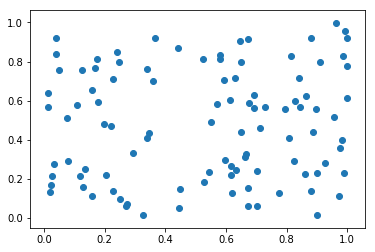

In [92]:
plt.scatter(xdata,ydata)
plt.show()

901
[0.00020763249166349198, 9.274444643873587e-05, 0.00014062072741391032, 0.00016103682009088881, 0.0025489636623014017, 0.002073676338511359, 0.0010069140746608027, 2.2340377696861376e-05, 0.0008050218141466576, 0.00052044700080847, 0.00015684919563620548, 0.00030177016870833027, 4.188111810787282e-07, 0.00019092409389363194, 0.0004687193575070059, 0.0006527336639616998, 0.0008425085752485403, 0.000906698743369813, 0.0009179648445373838, 0.002234301400131375, 0.0026281717002205746, 0.0016615991858070958, 0.003957093891629127, 0.002296583755233758, 0.0007583330211792875, 0.0011430867846853948, 0.0012397810276176095, 0.0016279029048758711, 0.002997663264721889, 0.00266032990101203, 0.005654526829007546, 0.003021346466067112, 0.0037159726227994692, 0.0030291202165600444, 0.0017303417494765588, 0.0004141893730542497, 0.0006375659563968408, 0.00022953395242583254, 0.00027980463775370546, 0.00023313758936203944, 0.00197647000483412, 0.0028878590309068144, 0.0035193538977192906, 0.00313051